In [141]:
import pandas as pd
import ipaddress
import numpy as np
import pandasql as ps
import matplotlib.pyplot as plt
from sklearn import preprocessing

%matplotlib inline

In [14]:
def pipeline(filename):
    df = pd.read_csv(filename, names = ['ip','date','time','zone','cik','accession','extention','code','size','idx','norefer','noagent','find','crawler','browser'])
    df['ip']= to_ipaddress(df['ip'])
    df['date'] = pd.to_datetime(df['date'])
    df['date'] = [date.date() for date in df['date']]
    return df[['ip', 'date','cik','accession']]

def to_ipaddress(arr): 
    arr = [np.char.replace(ip, ip[-3:],'000') for ip in arr]
    return [int(ipaddress.IPv4Address(x)) for x in arr]

def setupiptable(filename):
    df = pd.read_csv(filename)
    df.iloc[:,0] = df.iloc[:,0].apply(lambda x: int(ipaddress.IPv4Address(x)))
    df.iloc[:,1] = df.iloc[:,1].apply(lambda x: int(ipaddress.IPv4Address(x)))
    df.columns = ["from_ip","to_ip","code","country"]
    return df.drop(['code'],axis=1)

In [15]:
df1 = pipeline('~/Documents/Data/openplustten2003.csv')
df2 = pipeline('~/Documents/Data/openplustten2010.csv')
df3 = pipeline('~/Documents/Data/openplustten2017.csv')
dfgeo = setupiptable('~/Downloads/IP2LOCATION-LITE-DB1.CSV')

In [16]:
sql1code = '''
    SELECT * 
    FROM df1, dfgeo
    WHERE ip BETWEEN from_ip AND to_ip
'''
newdf1 = ps.sqldf(sql1code, locals()).drop(columns=['from_ip','to_ip'])

In [17]:
sql2code = '''
    SELECT * 
    FROM df2, dfgeo
    WHERE ip BETWEEN from_ip AND to_ip
'''
newdf2 = ps.sqldf(sql2code, locals()).drop(columns=['from_ip','to_ip'])

In [18]:
sql3code = '''
    SELECT * 
    FROM df3, dfgeo
    WHERE ip BETWEEN from_ip AND to_ip
'''
newdf3 = ps.sqldf(sql3code, locals()).drop(columns=['from_ip','to_ip'])

In [19]:
newdf1.to_csv('~/Documents/Data/2003df.csv')
newdf2.to_csv('~/Documents/Data/2010df.csv')
newdf3.to_csv('~/Documents/Data/2017df.csv')

In [165]:
covertime = {'Year':[2003,2010,2017], 'Number of Countries': [len(newdf1['country'].value_counts()), len(newdf2['country'].value_counts()), len(newdf3['country'].value_counts())]}

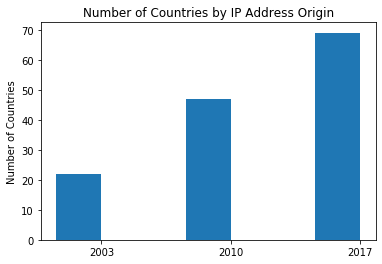

In [167]:
labels = covertime["Year"]
numco = covertime['Number of Countries']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, numco, width, label='Year')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Countries')
ax.set_title('Number of Countries by IP Address Origin')
ax.set_xticks(x)
ax.set_xticklabels(labels)

fig.savefig('numco.png')

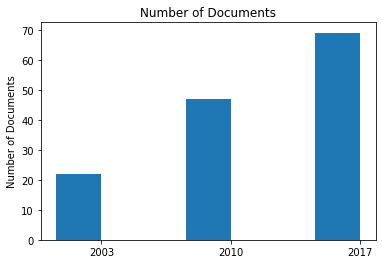

In [168]:
d_doc = {"Year":[2003,2010,2017],"Number of Documents":[len(newdf1['accession'].value_counts()), len(newdf2['accession'].value_counts()), len(newdf3['accession'].value_counts())]}
labelsd = d_doc["Year"]
numdoc = d_doc['Number of Documents']

x = np.arange(len(labelsd))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, numco, width, label='Year')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Documents')
ax.set_title('Number of Documents')
ax.set_xticks(x)
ax.set_xticklabels(labelsd)

fig.savefig('numdoc.png')

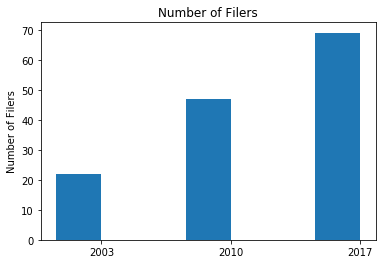

In [169]:
d_filer = {"Year":[2003,2010,2017],"Number of Filers":[len(newdf1['cik'].value_counts()), len(newdf2['cik'].value_counts()), len(newdf3['cik'].value_counts())]}
labelsf = d_filer["Year"]
numfiler = d_filer['Number of Filers']

x = np.arange(len(labelsf))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, numco, width, label='Year')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Filers')
ax.set_title('Number of Filers')
ax.set_xticks(x)
ax.set_xticklabels(labelsf)

fig.savefig('numfiler.png')

In [105]:
newdf1['country'].value_counts(normalize=True)

United States of America                                0.900209
United Kingdom of Great Britain and Northern Ireland    0.026646
France                                                  0.009927
Uruguay                                                 0.009404
Canada                                                  0.008359
Israel                                                  0.006270
Germany                                                 0.006270
Belgium                                                 0.005225
India                                                   0.005225
Singapore                                               0.004180
Italy                                                   0.003135
Hong Kong                                               0.003135
Sweden                                                  0.001567
Morocco                                                 0.001567
Greece                                                  0.001567
Netherlands              

In [138]:
newdf2['country'].value_counts(normalize=True)

United States of America                                0.884489
Canada                                                  0.027898
United Kingdom of Great Britain and Northern Ireland    0.019716
India                                                   0.017784
-                                                       0.016989
Germany                                                 0.003466
Sweden                                                  0.003295
China                                                   0.002898
Brazil                                                  0.002841
Israel                                                  0.002841
Hong Kong                                               0.002727
France                                                  0.002216
Philippines                                             0.001591
Slovakia                                                0.001364
Switzerland                                             0.001250
Japan                    

In [153]:
x03 = newdf1['country'].value_counts(normalize=True)
x10 = newdf2['country'].value_counts(normalize=True)
x17 = newdf3['country'].value_counts(normalize=True)

In [163]:
US03 = x03[0]
US10 = x10[0]
US17 = x17[0]
US03

0.900208986415883

In [155]:
Gb03 = 1 - US03
Gb10 = 1 - US10
Gb17 = 1 - US17

In [156]:
d = {"Year":[2003,2010,2017],"US Hits":[US03, US10, US17],"Global Hits":[Gb03,Gb10,Gb17]}

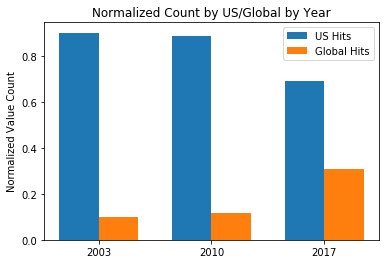

In [162]:
labels = d["Year"]
US_hits = d['US Hits']
GB_hits = d['Global Hits']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, US_hits, width, label='US Hits')
rects2 = ax.bar(x + width/2, GB_hits, width, label='Global Hits')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Normalized Value Count')
ax.set_title('Normalized Count by US/Global by Year')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.savefig('USvGB.png')

In [ ]:
# first = []
# second = []
# third = []
# fourth = []
# fifth = []

In [ ]:

# d_top5 = {"Year":[2003,2010,2017],"1":first,"2":second], "3":third, "4":fourth,"5":fifth}
# labels = d_top5["Year"]
# First_hits = d_top5['1']
# Second_hits = d_top5['2']
# Third_hits = d_top5['3']
# Fourth_hits = d_top5['4']
# Fifth_hits = d_top5['5']

# x = np.arange(len(labels))  # the label locations
# width = 0.35  # the width of the bars

# fig, ax = plt.subplots()
# rects1 = ax.bar(x - width/2, US_hits, width, label='US Hits')
# rects2 = ax.bar(x + width/2, GB_hits, width, label='Global Hits')

# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Normalized Value Count')
# ax.set_title('Top 5 Countries by Year')
# ax.set_xticks(x)
# ax.set_xticklabels(labels)
# ax.legend()

# #fig.savefig('top5countriesbyyear.png')